In [37]:
import pandas as pd 
import numpy as np 
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [ ]:
input_dir = '../json'
for filename in os.listdir(input_dir):
  if filename.endswith('.json'):
    try:
      with open(os.path.join(input_dir, filename), encoding='utf-8') as f:
        data = json.load(f)

      df = pd.DataFrame.from_dict(data, orient='index')

      df.index = df.index.str.replace('Năm ', '').astype(int) 
      df = df.sort_index()
      df.index = 'Năm ' + df.index.astype(str)  

      csv_filename = os.path.splitext(filename)[0] + '.csv'

      df.to_csv(os.path.join('../csv', csv_filename), encoding='utf-8', index=True)
      
      print(f"Đã xử lý và lưu: {csv_filename}")
    
    except Exception as e:
      print(f"Lỗi khi xử lý {filename}: {str(e)}")

Đã xử lý và lưu: agp_data.csv
Đã xử lý và lưu: amp_data.csv
Đã xử lý và lưu: amv_data.csv
Đã xử lý và lưu: apc_data.csv
Đã xử lý và lưu: bcp_data.csv
Đã xử lý và lưu: bio_data.csv
Đã xử lý và lưu: cdp_data.csv
Đã xử lý và lưu: cnc_data.csv
Đã xử lý và lưu: cvn_data.csv
Đã xử lý và lưu: dan_data.csv
Đã xử lý và lưu: dbd_data.csv
Đã xử lý và lưu: dbm_data.csv
Đã xử lý và lưu: dbt_data.csv
Đã xử lý và lưu: dcl_data.csv
Đã xử lý và lưu: ddn_data.csv
Đã xử lý và lưu: dhd_data.csv
Đã xử lý và lưu: dhg_data.csv
Đã xử lý và lưu: dhn_data.csv
Đã xử lý và lưu: dmc_data.csv
Đã xử lý và lưu: dnm_data.csv
Đã xử lý và lưu: dp1_data.csv
Đã xử lý và lưu: dp2_data.csv
Đã xử lý và lưu: dp3_data.csv
Đã xử lý và lưu: dph_data.csv
Đã xử lý và lưu: dpp_data.csv
Đã xử lý và lưu: dtg_data.csv
Đã xử lý và lưu: dth_data.csv
Đã xử lý và lưu: dtp_data.csv
Đã xử lý và lưu: dvm_data.csv
Đã xử lý và lưu: dvn_data.csv
Đã xử lý và lưu: fit_data.csv
Đã xử lý và lưu: gpc_data.csv
Đã xử lý và lưu: hdp_data.csv
Đã xử lý v

In [ ]:
def load_financial_csv(filename):
  try:
    df = pd.read_csv(filename, encoding='utf-8', index_col=0)
    
    df.index = df.index.str.replace('Năm ', '').astype(int)
    
    for col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '').astype(float, errors='ignore')
    
    df = df.sort_index()
    df.index = 'Năm ' + df.index.astype(str)
    return df
  except Exception as e:
      print(f"Lỗi khi đọc {filename}: {str(e)}")
      return None

dataframes = {}
input_dir = '../csv'
for filename in os.listdir(input_dir):
  if filename.endswith('.csv'):
    file_key = os.path.splitext(filename)[0].lower() 
    df = load_financial_csv(os.path.join(input_dir, filename))
    if df is not None:
      dataframes[file_key] = df
      print(f"Đã đọc và lưu: {filename}")
    else:
      print(f"Bỏ qua {filename} do lỗi")

Đã đọc và lưu: agp_data.csv
Đã đọc và lưu: amp_data.csv
Đã đọc và lưu: amv_data.csv
Đã đọc và lưu: apc_data.csv
Đã đọc và lưu: bcp_data.csv
Đã đọc và lưu: bio_data.csv
Đã đọc và lưu: cdp_data.csv
Đã đọc và lưu: cnc_data.csv
Đã đọc và lưu: cvn_data.csv
Đã đọc và lưu: dan_data.csv
Đã đọc và lưu: dbd_data.csv
Đã đọc và lưu: dbm_data.csv
Đã đọc và lưu: dbt_data.csv
Đã đọc và lưu: dcl_data.csv
Đã đọc và lưu: ddn_data.csv
Đã đọc và lưu: dhd_data.csv
Đã đọc và lưu: dhg_data.csv
Đã đọc và lưu: dhn_data.csv
Đã đọc và lưu: dmc_data.csv
Đã đọc và lưu: dnm_data.csv
Đã đọc và lưu: dp1_data.csv
Đã đọc và lưu: dp2_data.csv
Đã đọc và lưu: dp3_data.csv
Đã đọc và lưu: dph_data.csv
Đã đọc và lưu: dpp_data.csv
Đã đọc và lưu: dtg_data.csv
Đã đọc và lưu: dth_data.csv
Đã đọc và lưu: dtp_data.csv
Đã đọc và lưu: dvm_data.csv
Đã đọc và lưu: dvn_data.csv
Đã đọc và lưu: fit_data.csv
Đã đọc và lưu: gpc_data.csv
Đã đọc và lưu: hdp_data.csv
Đã đọc và lưu: imp_data.csv
Đã đọc và lưu: jvc_data.csv
Đã đọc và lưu: ldp_d

In [ ]:
rows_2024 = []

for df_name, df in dataframes.items():
  if 'Năm 2024' in df.index:
    row = df.loc[['Năm 2024']].copy()
    row.index = [df_name]  
    rows_2024.append(row)
  else:
    print(f"Không tìm thấy Năm 2024 trong {df_name}")

df_2024 = pd.concat(rows_2024) if rows_2024 else pd.DataFrame()

print("df_2024:")
display(df_2024)

df_2024:


,Doanh thu thuần,Lợi nhuận gộp,LN thuần từ HĐKD,LNST thu nhập DN,LNST của CĐ cty mẹ,Tài sản ngắn hạn,Tổng tài sản,Nợ phải trả,Nợ ngắn hạn,Vốn chủ sở hữu,EPS 4 quý,BVPS cơ bản,P/E cơ bản,ROS,ROEA,ROAA,Lợi ích của CĐ thiểu số
agp_data,793261.0,233017.0,60595.0,48890.0,48890.0,609779.0,1094279.0,694419.0,575850.0,399859.0,2184.0,17277.0,17.82,6.16,12.96,4.91,NaN
amp_data,1073032.0,84849.0,6831.0,3653.0,3653.0,1097544.0,1195416.0,994608.0,993674.0,200808.0,281.0,15443.0,50.89,0.34,1.97,0.33,NaN
amv_data,309827.0,32708.0,-6636.0,3335.0,4754.0,973005.0,1975012.0,281577.0,155077.0,1693435.0,36.0,12917.0,41.37,1.08,0.28,0.24,NaN
apc_data,131101.0,31743.0,-20560.0,-20860.0,-20860.0,87877.0,814193.0,244412.0,132406.0,569781.0,-1042.0,28317.0,-6.34,-15.91,-3.60,-2.45,NaN
bcp_data,147032.0,15608.0,515.0,345.0,345.0,60990.0,111094.0,76270.0,70558.0,34825.0,58.0,5804.0,182.64,0.23,1.00,0.32,NaN
bio_data,72711.0,22663.0,10594.0,7932.0,7932.0,73559.0,111763.0,12230.0,12230.0,99534.0,931.0,11639.0,16.60,10.91,8.05,7.14,NaN
cdp_data,3208680.0,235904.0,27689.0,19070.0,19070.0,1933714.0,2134674.0,1917466.0,1888268.0,217208.0,1047.0,11929.0,9.74,0.59,9.06,0.89,NaN
cnc_data,500961.0,108796.0,46006.0,36001.0,36001.0,266707.0,389453.0,198793.0,198793.0,190660.0,3168.0,16777.0,11.02,7.19,19.37,9.53,NaN
cvn_data,95730.0,13253.0,3316.0,2823.0,2831.0,76613.0,477219.0,67980.0,55033.0,409238.0,96.0,13779.0,19.93,2.95,0.70,0.59,NaN
dan_data,564732.0,293217.0,98081.0,69998.0,69998.0,567184.0,1596131.0,831061.0,400253.0,765070.0,3343.0,36533.0,9.27,12.39,9.49,4.84,NaN


In [27]:
df_2024 = df_2024.drop(columns=['Lợi ích của CĐ thiểu số'])

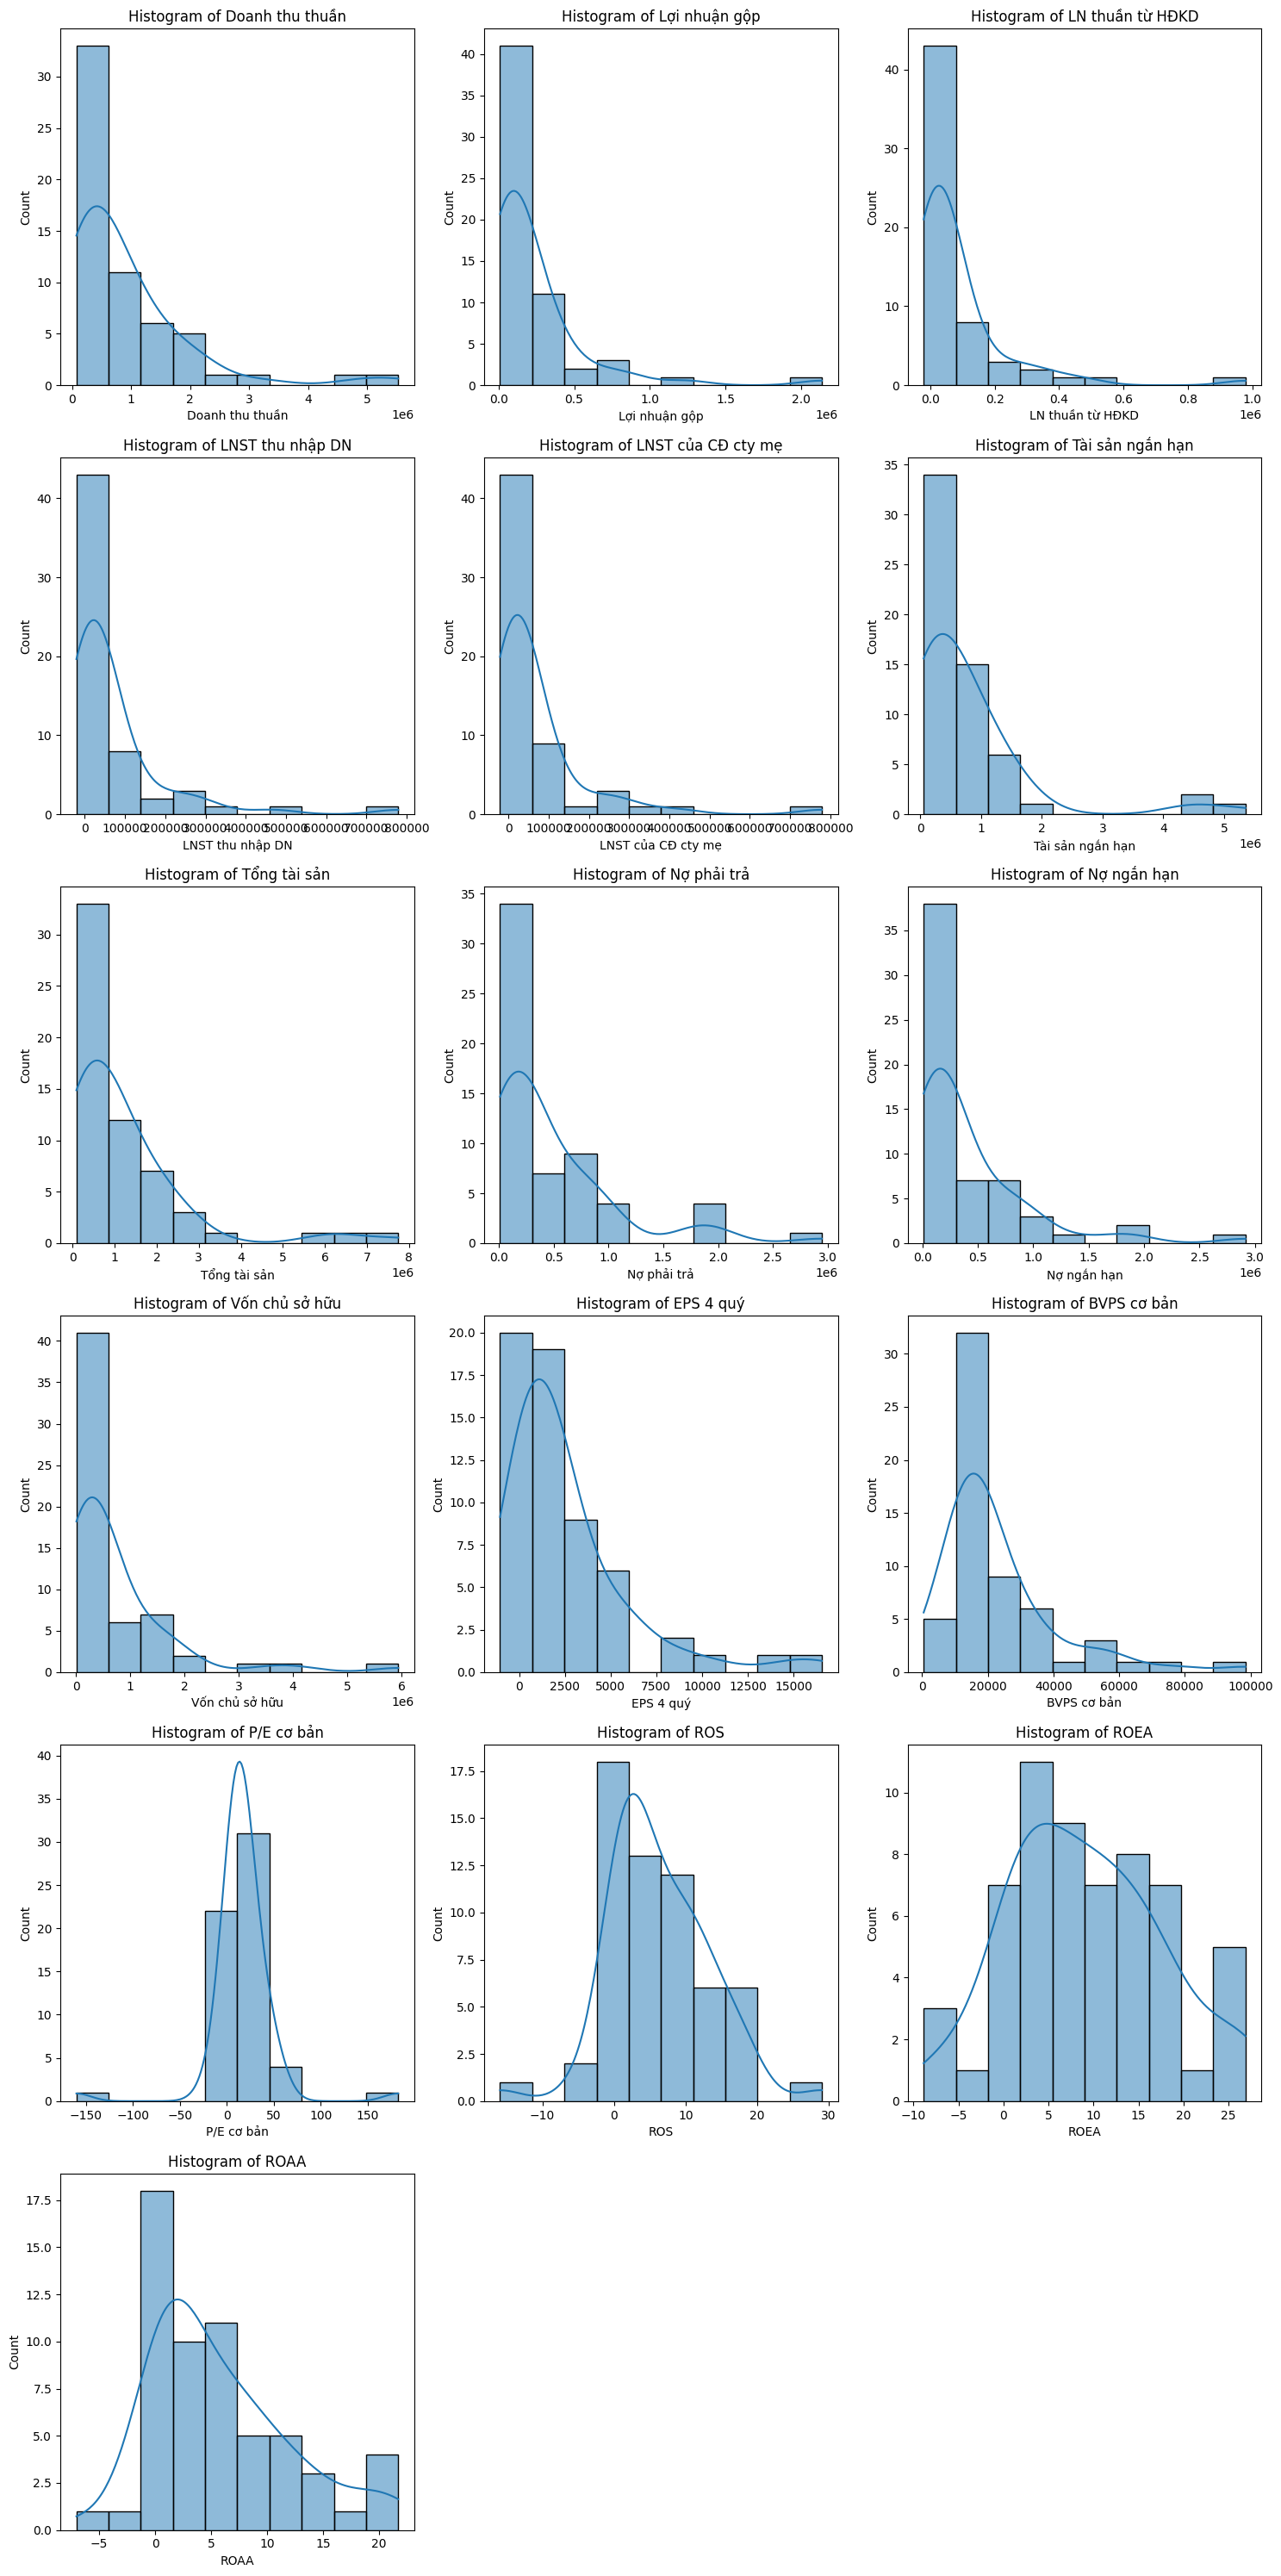

In [ ]:
numeric_columns = df_2024.select_dtypes(include=[np.number]).columns

# Xác định số lượng subplot (số cột số)
n_cols = len(numeric_columns)
n_rows = (n_cols + 2) // 3  # 3 histogram mỗi hàng, làm tròn lên
fig, axes = plt.subplots(n_rows, min(n_cols, 3), figsize=(15, 5 * n_rows), squeeze=False)

# Flatten axes để dễ duyệt
axes = axes.flatten()

# Vẽ histogram cho từng cột số
for i, col in enumerate(numeric_columns):
    sns.histplot(data=df_2024[col], ax=axes[i], bins=10, kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Ẩn các subplot không dùng (nếu có)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

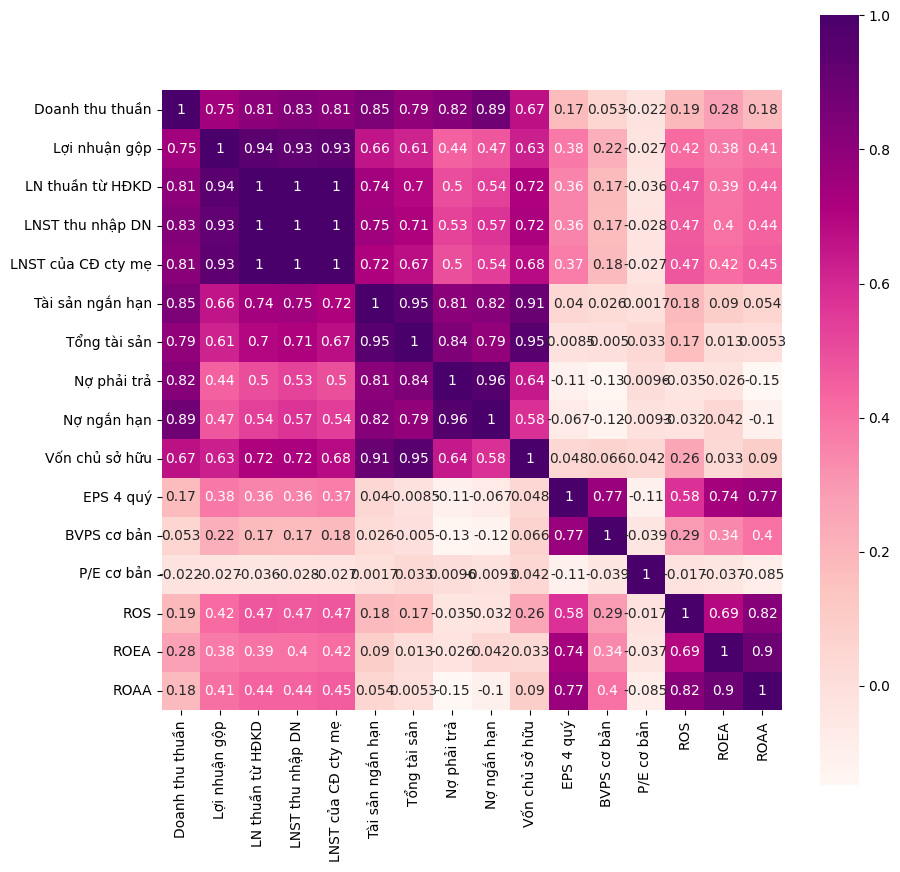

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df_2024.select_dtypes(include=['number']).corr(),annot=True,square=True,cmap='RdPu')
plt.show()

In [31]:
scaler = StandardScaler()
df_2024_scaled = scaler.fit_transform(df_2024)
X_scaled = pd.DataFrame(df_2024_scaled, columns=df_2024.columns)

In [32]:
pca = PCA(random_state=42, n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [33]:
df_X_pca = pd.DataFrame(X_pca, columns=['col1', 'col2', 'col3'])
df_X_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,59.0,8.091456e-17,2.878933,-3.006121,-1.786044,-0.739093,0.505461,13.354919
col2,59.0,-9.408670e-17,1.970068,-4.277787,-1.230675,-0.243049,0.962089,4.933375
col3,59.0,-7.809196e-17,1.020432,-4.229313,-0.435210,0.052867,0.463711,4.393938


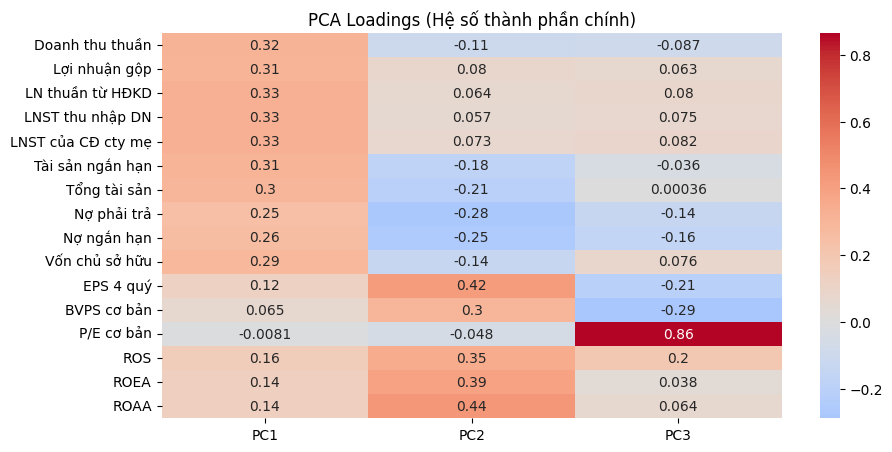

In [ ]:
#Xem mức độ đóng góp của các thành phần chính
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=X_scaled.columns)
plt.figure(figsize=(10, 5))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings (Hệ số thành phần chính)")
plt.show()

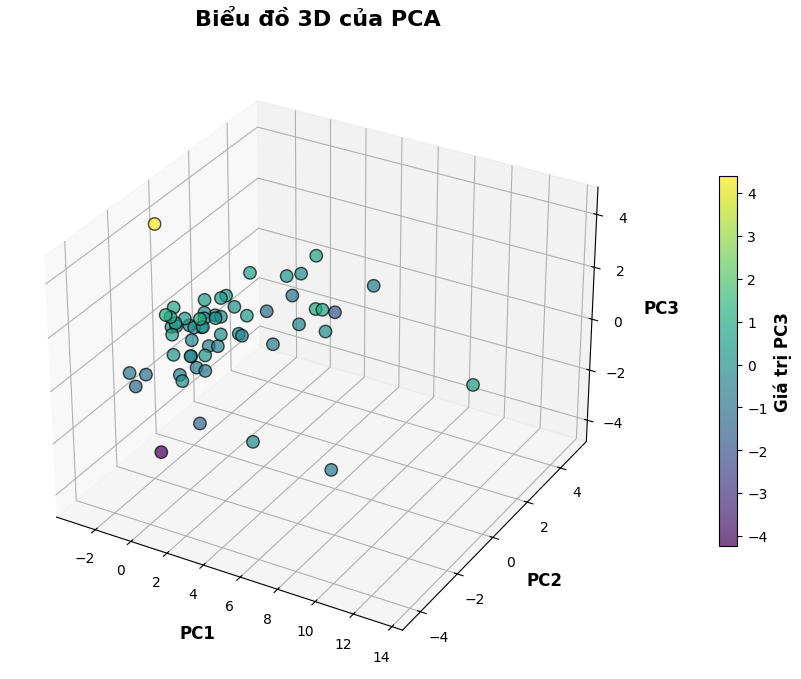

In [35]:
#Biểu đồ 3D thể hiện sự phân bố của dữ liệu sau giảm chiều
fig = plt.figure(figsize=(12, 8), facecolor='white')
ax = fig.add_subplot(111, projection='3d', facecolor='none')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=X_pca[:, 2],
                     cmap="viridis",
                     edgecolors='k',
                     s=80,
                     alpha=0.7,
                     depthshade=True)

ax.set_xlabel("PC1", fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel("PC2", fontsize=12, labelpad=10, fontweight='bold')
ax.set_zlabel("PC3", fontsize=12, labelpad=10, fontweight='bold')

ax.set_title("Biểu đồ 3D của PCA", fontsize=16, pad=20, fontweight='bold')

legend = plt.colorbar(scatter, ax=ax, shrink=0.6, pad=0.1)
legend.set_label("Giá trị PC3", fontsize=12, fontweight='bold')
legend.ax.tick_params(labelsize=10)

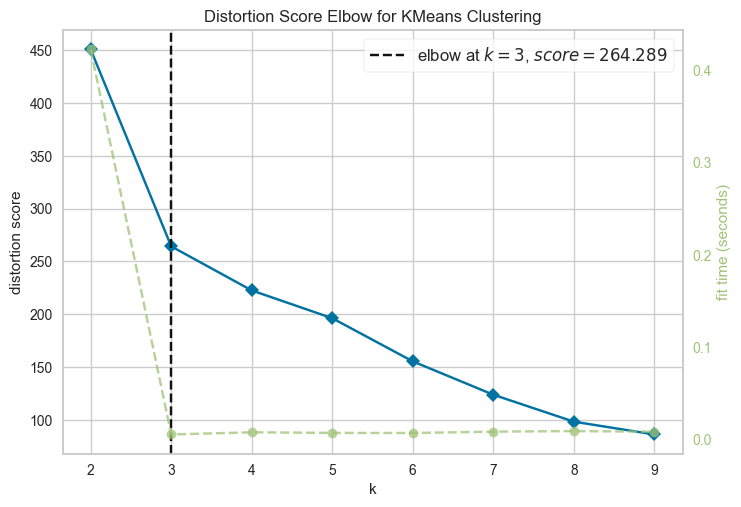

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
#Tìm K trên dữ liệu đã giảm chiều
kmean_test = KMeans(random_state=42, n_init='auto', init='k-means++')
visualizer = KElbowVisualizer(kmean_test, k=(2,10))
visualizer.fit(X_pca)
visualizer.show()

In [39]:
#Xây dựng mô hình KMeans với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init='auto')
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [40]:
#Đánh giá độ tốt của cụm
print(silhouette_score(X_pca, kmeans.labels_))
print(davies_bouldin_score(X_pca, kmeans.labels_))

0.4816414695497644
0.7926566044525859


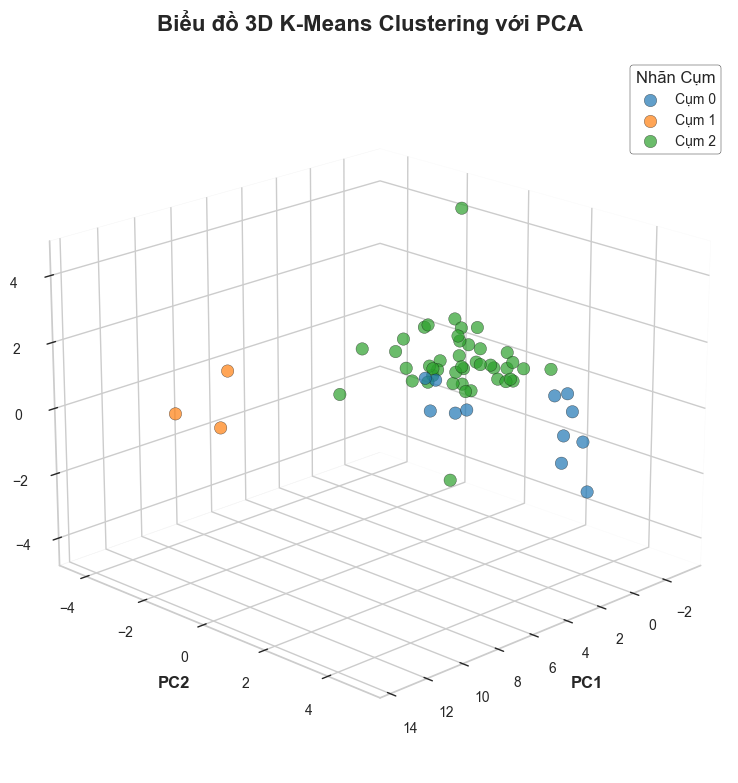

In [41]:
#Biểu đồ 3D thể hiện sự phân bố dữ liệu của các cụm
fig = plt.figure(figsize=(12, 8), facecolor='white')
ax = fig.add_subplot(111, projection='3d', facecolor='none')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

for i in np.unique(kmeans.labels_):
  ax.scatter(X_pca[kmeans.labels_ == i, 0],
              X_pca[kmeans.labels_ == i, 1],
              X_pca[kmeans.labels_ == i, 2],
              label=f'Cụm {i}',
              s=80,
              alpha=0.7,
              edgecolors='k',
              c=colors[i % len(colors)],
              depthshade=True)

ax.set_xlabel("PC1", fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel("PC2", fontsize=12, labelpad=10, fontweight='bold')
ax.set_zlabel("PC3", fontsize=12, labelpad=10, fontweight='bold')

ax.set_title("Biểu đồ 3D K-Means Clustering với PCA", fontsize=16, pad=20, fontweight='bold')

ax.legend(title="Nhãn Cụm",
          title_fontsize=12,
          fontsize=10,
          loc='upper right',
          frameon=True,
          edgecolor='black',
          facecolor='white',
          framealpha=0.9)

ax.view_init(elev=20, azim=45)

ax.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.dist = 12

plt.tight_layout()
plt.show()

In [42]:
pd.DataFrame(kmeans.labels_, columns=['Cluster']).value_counts().sort_index()

Cluster
0          12
1           3
2          44
Name: count, dtype: int64

In [44]:
df_2024['Cluster'] = kmeans.labels_

In [45]:
df_2024

,Doanh thu thuần,Lợi nhuận gộp,LN thuần từ HĐKD,LNST thu nhập DN,LNST của CĐ cty mẹ,Tài sản ngắn hạn,Tổng tài sản,Nợ phải trả,Nợ ngắn hạn,Vốn chủ sở hữu,EPS 4 quý,BVPS cơ bản,P/E cơ bản,ROS,ROEA,ROAA,Cluster
agp_data,793261.0,233017.0,60595.0,48890.0,48890.0,609779.0,1094279.0,694419.0,575850.0,399859.0,2184.0,17277.0,17.82,6.16,12.96,4.91,2
amp_data,1073032.0,84849.0,6831.0,3653.0,3653.0,1097544.0,1195416.0,994608.0,993674.0,200808.0,281.0,15443.0,50.89,0.34,1.97,0.33,2
amv_data,309827.0,32708.0,-6636.0,3335.0,4754.0,973005.0,1975012.0,281577.0,155077.0,1693435.0,36.0,12917.0,41.37,1.08,0.28,0.24,2
apc_data,131101.0,31743.0,-20560.0,-20860.0,-20860.0,87877.0,814193.0,244412.0,132406.0,569781.0,-1042.0,28317.0,-6.34,-15.91,-3.60,-2.45,2
bcp_data,147032.0,15608.0,515.0,345.0,345.0,60990.0,111094.0,76270.0,70558.0,34825.0,58.0,5804.0,182.64,0.23,1.00,0.32,2
bio_data,72711.0,22663.0,10594.0,7932.0,7932.0,73559.0,111763.0,12230.0,12230.0,99534.0,931.0,11639.0,16.60,10.91,8.05,7.14,2
cdp_data,3208680.0,235904.0,27689.0,19070.0,19070.0,1933714.0,2134674.0,1917466.0,1888268.0,217208.0,1047.0,11929.0,9.74,0.59,9.06,0.89,2
cnc_data,500961.0,108796.0,46006.0,36001.0,36001.0,266707.0,389453.0,198793.0,198793.0,190660.0,3168.0,16777.0,11.02,7.19,19.37,9.53,2
cvn_data,95730.0,13253.0,3316.0,2823.0,2831.0,76613.0,477219.0,67980.0,55033.0,409238.0,96.0,13779.0,19.93,2.95,0.70,0.59,2
dan_data,564732.0,293217.0,98081.0,69998.0,69998.0,567184.0,1596131.0,831061.0,400253.0,765070.0,3343.0,36533.0,9.27,12.39,9.49,4.84,2


In [46]:
df_2024.groupby('Cluster').mean(numeric_only=True)

,Doanh thu thuần,Lợi nhuận gộp,LN thuần từ HĐKD,LNST thu nhập DN,LNST của CĐ cty mẹ,Tài sản ngắn hạn,Tổng tài sản,Nợ phải trả,Nợ ngắn hạn,Vốn chủ sở hữu,EPS 4 quý,BVPS cơ bản,P/E cơ bản,ROS,ROEA,ROAA
Cluster,,,,,,,,,,,,,,,,
0,1.225383e+06,4.661287e+05,187409.750000,154995.333333,153466.916667,8.253429e+05,1.177970e+06,2.911850e+05,2.764064e+05,8.867852e+05,7788.500000,41985.333333,10.232500,13.953333,20.190833,14.975000
1,4.120109e+06,1.041110e+06,562171.333333,474506.000000,439666.333333,4.772951e+06,6.720836e+06,2.205648e+06,2.023545e+06,4.515189e+06,2695.000000,21201.666667,14.536667,11.153333,10.703333,7.056667
2,5.873328e+05,1.067030e+05,24145.477273,19487.159091,19488.409091,4.869712e+05,8.309318e+05,4.036025e+05,3.335478e+05,4.273292e+05,1137.840909,18002.159091,18.211818,3.882500,6.012500,3.182727


C:\Users\NITRO\AppData\Local\Temp\ipykernel_22860\628903098.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_2024, ax=axes[i], palette=cluster_colors)
C:\Users\NITRO\AppData\Local\Temp\ipykernel_22860\628903098.py:19: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(x='Cluster', y=col, data=df_2024, ax=axes[i], palette=cluster_colors)
C:\Users\NITRO\AppData\Local\Temp\ipykernel_22860\628903098.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_2024, ax=axes[i], palette=cluster_colors)
C:\Users\NITRO\AppData\Local\Temp\ipykernel_22860\628903098.py:19: UserWarning: The pal

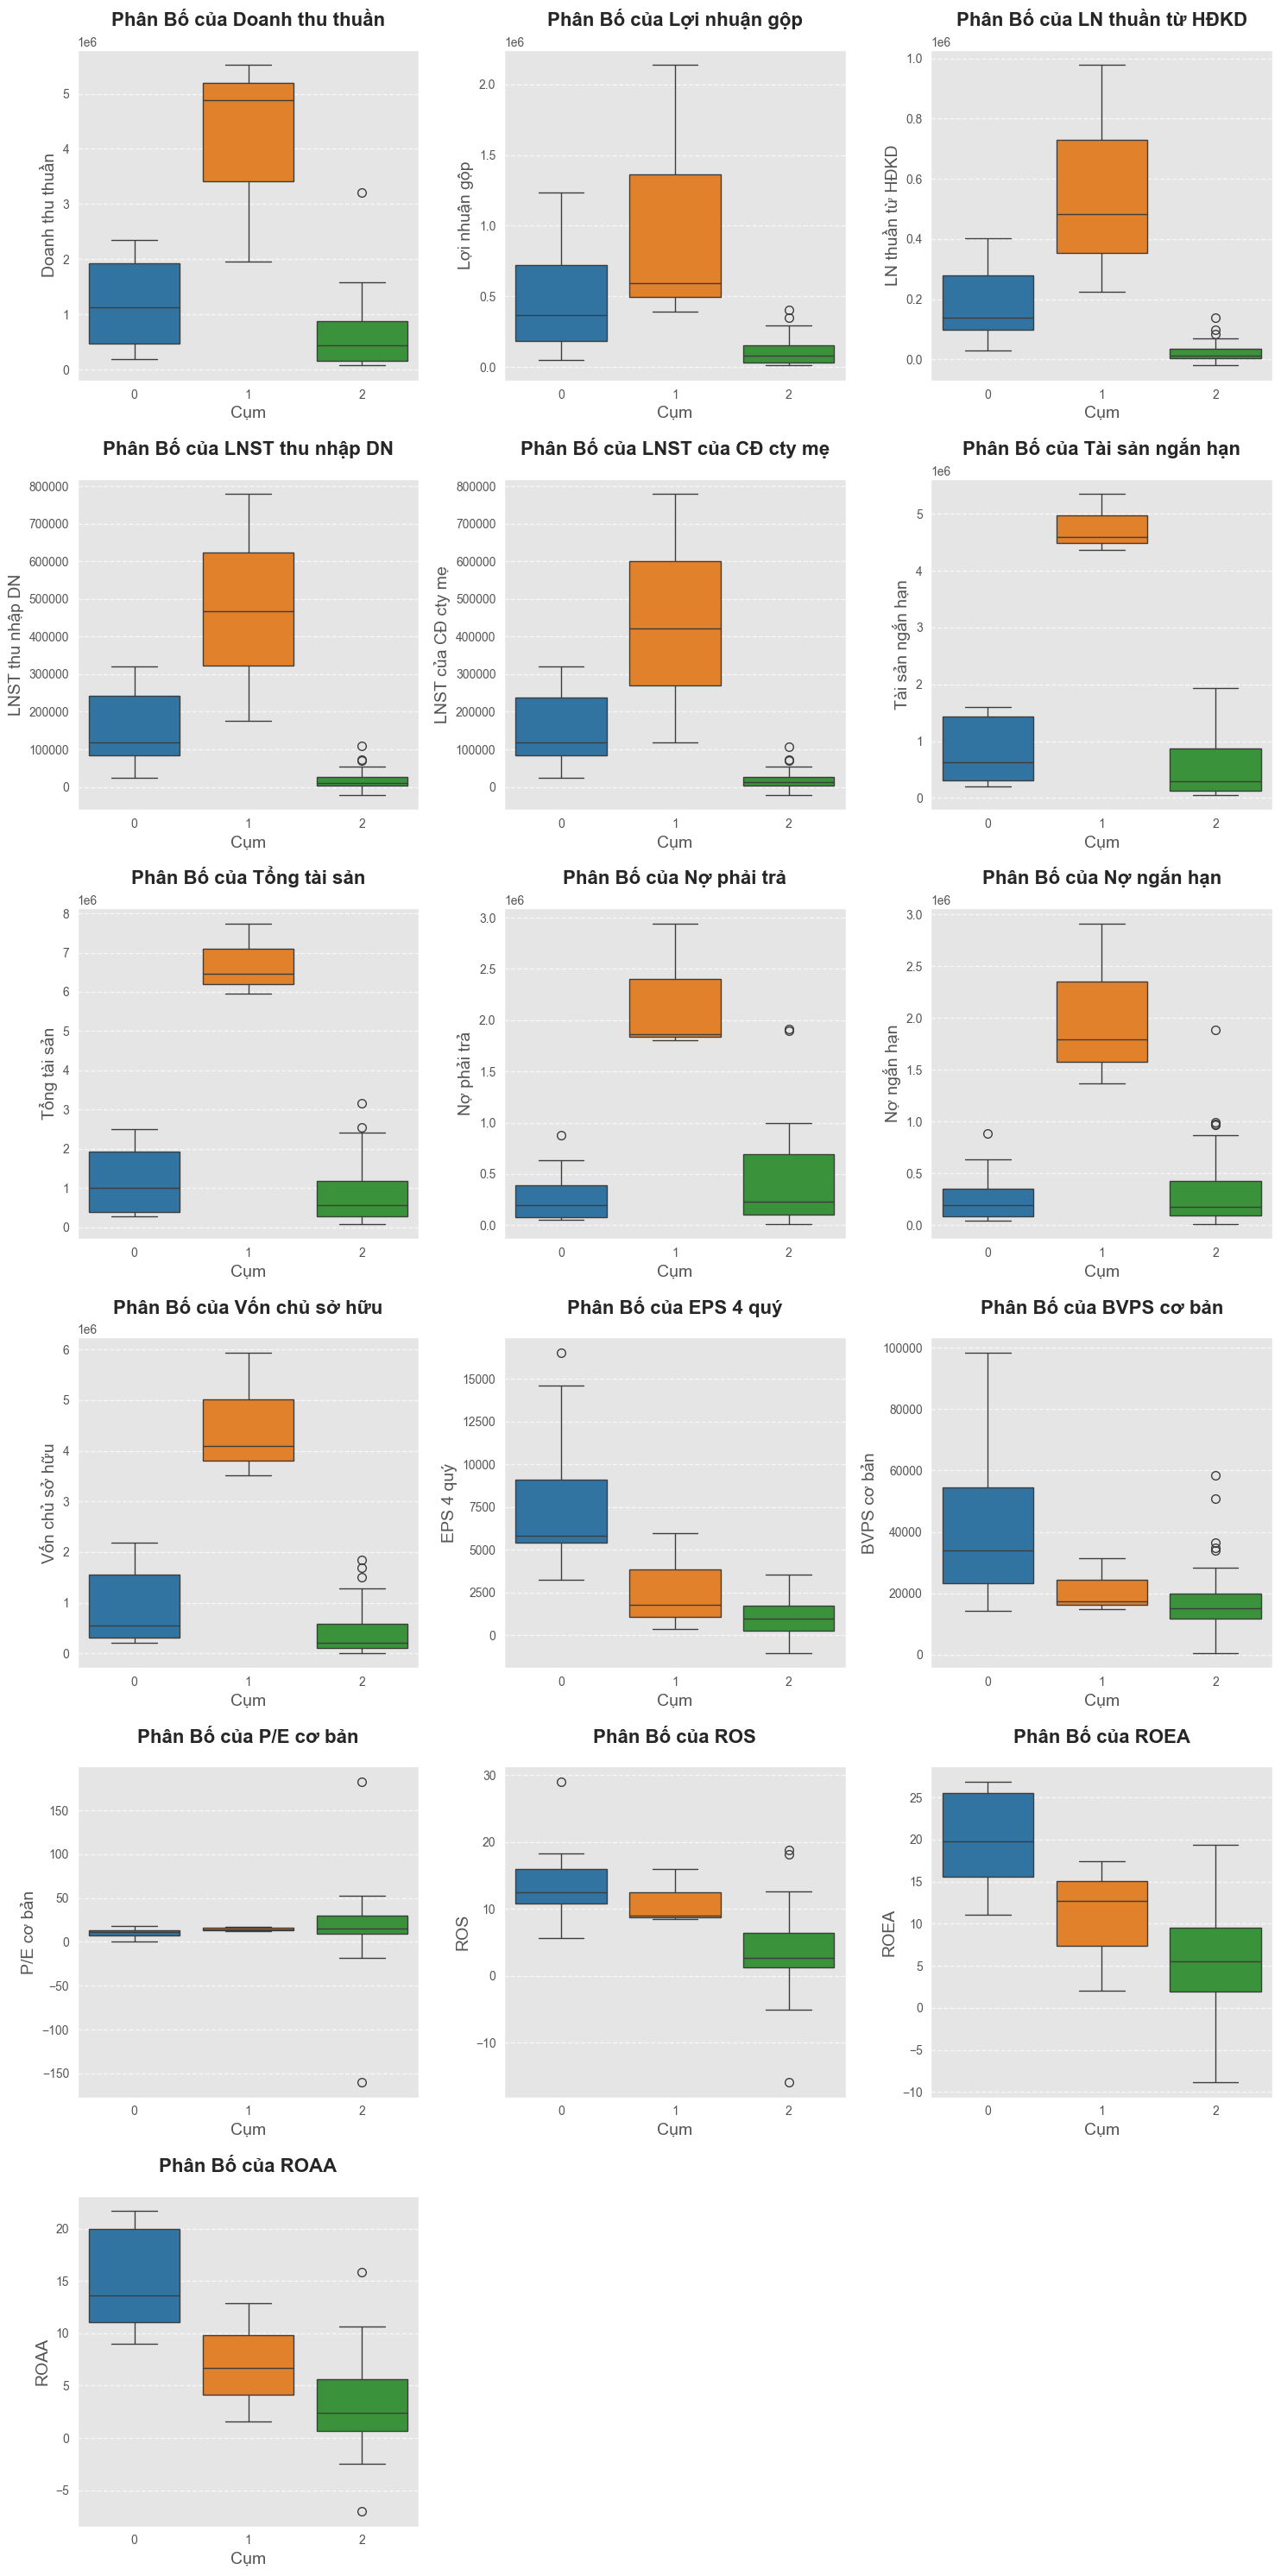

In [48]:
plt.style.use('ggplot')
sns.set_palette("Set2")
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

numeric_columns = df_2024.select_dtypes(include=np.number).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in ['Cluster', 'CustomerKey', 'GeographyKey']]

n_cols = len(numeric_columns)
n_rows = (n_cols + 2) // 3  

fig, axes = plt.subplots(n_rows, min(n_cols, 3), figsize=(15, 5 * n_rows), squeeze=False)
axes = axes.flatten()  

for i, col in enumerate(numeric_columns):
  sns.boxplot(x='Cluster', y=col, data=df_2024, ax=axes[i], palette=cluster_colors)
  axes[i].set_title(f'Phân Bố của {col}', fontsize=16, fontweight='bold', pad=20)
  axes[i].set_xlabel('Cụm', fontsize=14)
  axes[i].set_ylabel(f'{col}', fontsize=14)
  axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
  axes[j].set_visible(False)

plt.tight_layout()
plt.show()